<a href="https://colab.research.google.com/github/othoni-hub/ECG2/blob/main/Ch05_StatistiquesBivariees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CPGE-ECG2** 




## **Ch4 - Notebook : Statistiques bivariées**

<img src="https://drive.google.com/uc?id=12Wo3LubGGT4qOvYFAuLP4CyCuwjKNVuk" width="230" height="150" align = "right"/>




**O.Thöni - Lycée Saint-Charles Sainte Croix - LE MANS**

## **1<sup>er</sup> exemple : chauffage central**



Les données sont saisies grâce à un dictionnaire, pour figurer la relation entre la clé (température) et la valeur (volume de fuel constaté)

In [ ]:
serie = {-6 : 40, -4 : 36, 0 : 35, 5 : 23, 10 : 16}
serie

{-6: 40, -4: 36, 0: 35, 5: 23, 10: 16}

On sépare la série **"explicative"** : les températures...

In [ ]:
temperatures = list(serie.keys())
temperatures

[-6, -4, 0, 5, 10]

... et la série **"expliquée"** : les volumes de fuel consommés

In [ ]:
volumes_fuel = list(serie.values())
volumes_fuel

[40, 36, 35, 23, 16]

### **Calcul du point moyen**

In [ ]:
x_bar = np.mean(temperatures)
x_bar

1.0

In [ ]:
y_bar = np.mean(volumes_fuel)
y_bar

30.0

### **visualisation du nuage de points**

In [ ]:
# import des bibiliothèques nécessaires
import matplotlib.pyplot as plt     # matplotlib.pyplot permet de réaliser des graphiques
import numpy as np                  # numpy est utile ici pour générer des listes régulières de nombres réels dans un intervalle donné


In [ ]:
def centrax(xmin, xmax, ymin, ymax, titre, legende = []):
    '''Cette procédure ajuste les paramètres graphiques : fenêtre (xmin, xmax, ymin, ymax), titre, légende (vide par défaut)'''
    # ajustement des paramètres des axes (centrage, couleur, etc.)
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    ax.legend(legende)

    plt.xlim(xmin,xmax)   
    plt.ylim(ymin,ymax)       # fenêtre d'affichage
    plt.title(titre) # titre du graphique au format LaTeX (encadré par des $)
    plt.show()

In [ ]:
# paramètres graphiques
xmin = -10
xmax = 15
ymin = -2
ymax = 50
titre = 'Volume de fuel consommé selon la température constatée'



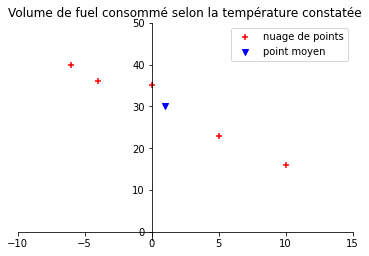

In [ ]:
plt.scatter(temperatures,volumes_fuel,marker ='+',color = 'red') # représentation graphique du nuage de points
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")
legende=['nuage de points', 'point moyen']
centrax(xmin, xmax, ymin, ymax, titre, legende)

On constate que le nuage de points est plutôt rectiligne, ce qui justifie l'emploi d'un ajustement **linéaire**, par la méthode des moindres carrés.

In [ ]:
def droite(xx,a,b) :
    '''Cette fonction reçoit un vecteur d'abscisse, un coefficient directeur a et une ordonnée à l'origine b
    et trace la droite y = ax + b'''
    yy = [a*x + b for x in xx]
    plt.plot(xx,yy,color  ='blue', linewidth = 0.5)

**ajustement "au doigt mouillé"**

* On fixe "au pifomètre" une équation de droite d'ajustement

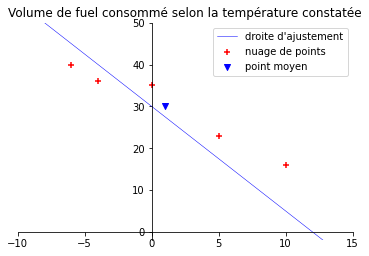

In [ ]:
xx = [xmin,xmax]
a = -2.5
b = 30

plt.scatter(temperatures,volumes_fuel,marker ='+',color = 'red')
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")
droite(xx,a,b)

legende=["droite d'ajustement",'nuage de points', 'point moyen']
centrax(xmin, xmax, ymin, ymax, titre, legende)

* On calcule les volumes de fuel ajustés, c'est-à-dire si l'on remplace le volume réel constaté par l'ordonnée du point de la droite ayant la même abscisse.

In [ ]:
def y_ajuste(xx,a,b):
    '''Cette fonction reçoit une liste xx, les coeeficients caractéristiques de la droite de régression
    et renvoie la liste des ordonnées ajustées sur cette droite'''
    yy = [a*x + b for x in xx]
    return yy

In [ ]:
volumes_ajustes = y_ajuste(temperatures,a,b)
volumes_ajustes

[45.0, 40.0, 30.0, 17.5, 5.0]

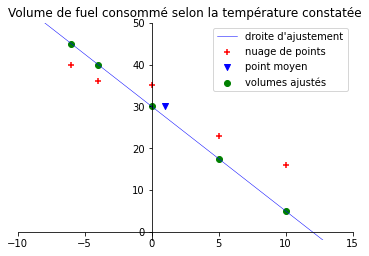

In [ ]:
plt.scatter(temperatures,volumes_fuel,marker ='+',color = 'red')        # nuage de points
droite(xx,a,b)                                                          # droite d'ajustement
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")                   # point moyen du nuage
plt.scatter(temperatures,volumes_ajustes,marker ='o',color = 'green')   # volumes ajustés sur la droite

legende=["droite d'ajustement",'nuage de points','point moyen', 'volumes ajustés']
centrax(xmin, xmax, ymin, ymax, titre, legende)

* On calcule les **"résidus"** verticaux, c'est-à-dire la somme des carrés des distances entre les volumes réels constatés et les volumes ajustés.

In [ ]:
def residus(y_reels,y_ajustes) : 
    '''Cette fonction reçoit deux listes : y_reels et y_ajustes, 
    et renvoie le "résidu" d'ajustement de la 1ère par la 2nde'''
    res = sum([(y_reels[k] - y_ajustes[k])**2 for k in range(len(y_reels))])
    return res

In [ ]:
residus(volumes_fuel,volumes_ajustes)

217.25

* on peut visualiser ces résidus

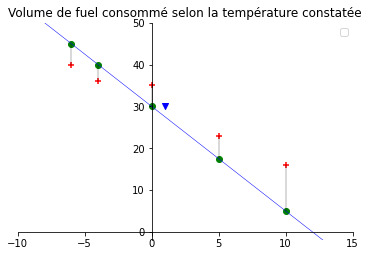

In [ ]:
plt.scatter(temperatures,volumes_fuel,marker ='+',color = 'red')        # nuage de points
droite(xx,a,b)                                                          # droite d'ajustement
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")                   # point moyen du nuage
plt.scatter(temperatures,volumes_ajustes,marker ='o',color = 'green')   # volumes ajustés sur la droite
plt.plot([temperatures, temperatures],[volumes_fuel,volumes_ajustes], color = "black", linewidth = 0.3)

centrax(xmin, xmax, ymin, ymax, titre)

## **Calcul de la droite d'ajustement linéaire, droite de régression du volume de fuel en la température**

**rappels**
* **covariance empirique :** 

$s_{XY} = \frac{1}{n} \sum_{i = 1}^{n} \left ( x_i - \bar{x}\right)\left ( xy_i - \bar{y}\right)$

* **coefficient directeur de la droite e Y en X :**

$ a = \frac{s_{XY}}{\sigma^2(X)}$

* **ordonnée à l'origine de la droite de régression de Y en X**

$ b = \bar{y} - a . \bar{x}$

* **équation de la droite de régression de Y en X :**

$y = a . x + b$

In [ ]:
def covariance_empirique(x,y) :
    '''Cette fonction reçoit deux listes x et y, de même taille, 
    et renvoie la covariance de ces deux listes
    Remarque : si x = y, on obtient la variance de x.'''
    xbar = np.mean(x)
    ybar = np.mean(y)
    n = len(x)

    s_XY = 1/n * sum([(x[k] - xbar)*(y[k] - ybar) for k in range(n)])
    return s_XY

In [ ]:
s_XY = covariance_empirique(temperatures, volumes_fuel)
s_XY

-51.800000000000004

In [ ]:
def coeff_droite_regression(x,y):
    '''Cette fonction reçoit deux listes x et y de même taille,
    et renvoie les coefficients de la droite d'ajustemennt de y en x'''
    xbar = np.mean(x)
    ybar = np.mean(y)

    # pente
    a = covariance_empirique(temperatures, volumes_fuel) / covariance_empirique(temperatures, temperatures)
    # ordonnée à l'origine
    b = ybar - a * xbar
    return a, b

In [ ]:
a,b = coeff_droite_regression(temperatures, volumes_fuel)
print('Équation de la droite de régression de Y en X : y=' + str(a) + '.x + ' + str(b))

Équation de la droite de régression de Y en X : y=-1.5058139534883723.x + 31.50581395348837


**Représentation graphique**

In [ ]:
volumes_ajustes = y_ajuste(temperatures,a,b)
volumes_ajustes

[40.5406976744186,
 37.52906976744186,
 31.50581395348837,
 23.97674418604651,
 16.44767441860465]

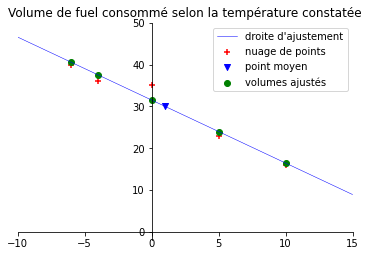

In [ ]:
plt.scatter(temperatures,volumes_fuel,marker ='+',color = 'red')        # nuage de points
droite(xx,a,b)                                                          # droite d'ajustement
plt.scatter(x_bar,y_bar,marker = "v", color = "blue")                   # point moyen du nuage
plt.scatter(temperatures,volumes_ajustes,marker ='o',color = 'green')   # volumes ajustés sur la droite

legende=["droite d'ajustement",'nuage de points','point moyen', 'volumes ajustés']
centrax(xmin, xmax, ymin, ymax, titre, legende)

On observe que la droite de régression de Y en X passe bien par le point moyen !

In [ ]:
residus(volumes_fuel,volumes_ajustes)

15.994186046511633

On a optimisé ces résidus.

### **Interpolation et extrapolations linéaires**

* Par interpolation, indiquer la consommation à prévoir pour une température extérieure de 8°C. 



In [ ]:
x = 8
y = a*x + b
print("S'il fait " + str(x) + "°C, la consommation de fuel à prévoir est de : " + str(np.round(y*10)/10) + ' L.')

S'il fait 8°C, la consommation de fuel à prévoir est de : 19.5 L.


* Par extrapolation, calculer quelle consommation prévoir lorsqu'il fait -10°C. 

In [ ]:
x = -10
y = a*x + b
print("S'il fait " + str(x) + "°C, la consommation de fuel à prévoir est de : " + str(np.round(y*10)/10) + ' L.')

S'il fait -10°C, la consommation de fuel à prévoir est de : 46.6 L.
